In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
#Read data from csv file using pandas and store it as dataframe. 
df_01 = pd.read_csv('FastFoodRestaurants.csv')

#print dataframe
df_01

In [ ]:
#print first 5 elements of dataframe
df_01.head()

In [7]:
# Describe the dataframe by printing statistical summaries of columns 
df_01.describe(include='all')

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,9535
unique,9934,2775,1,10000,NaN,NaN,548,5289,52,3821
top,515 E Main St,Cincinnati,US,us/ar/springdale/401sthompsonst/696490760,NaN,NaN,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,3,119,10000,1,NaN,NaN,1886,23,676,1074
mean,NaN,NaN,NaN,NaN,37.552195,-91.056132,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.050275,18.556339,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-6.244273,-159.378915,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.028706,-97.412631,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.298217,-87.660930,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.116765,-81.458351,NaN,NaN,NaN,NaN


In [8]:
# print column information - has number of non-nullable values and datatypes
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    9535 non-null   object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [9]:
# print number of unique values for each column
df_01.nunique(axis=0)

address        9934
city           2775
country           1
keys          10000
latitude       9935
longitude      9956
name            548
postalCode     5289
province         52
websites       3821
dtype: int64

In [10]:
# tells if a value is null or not. 
pd.isna(df_01)

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [11]:
# gives list of columns having null values
print(df_01.columns[df_01.isna().any()])
print(df_01.columns[df_01.isnull().any()])

Index(['websites'], dtype='object')
Index(['websites'], dtype='object')


In [12]:
# rows x columns
df_01.shape

(10000, 10)

In [13]:
# Fill empty cells in websites column with 'None'. 
df_01['websites'] = df_01['websites'].fillna('None')

In [14]:
# now check no.of non-nullable values for websites. 
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    10000 non-null  object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [15]:
# just printing all unique provinces.
df_01.province.unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'OK', 'IN', 'NC', 'TN', 'TX', 'LA',
       'KS', 'ND', 'UT', 'GA', 'NM', 'OR', 'HI', 'VT', 'MI', 'MO', 'WI',
       'WA', 'MS', 'NE', 'ME', 'MN', 'AL', 'IA', 'WV', 'AZ', 'SD', 'WY',
       'IL', 'VA', 'FL', 'CA', 'MT', 'ID', 'PA', 'RI', 'NV', 'NJ', 'MA',
       'MD', 'CO', 'NH', 'CT', 'AK', 'DE', 'DC', 'Co Spgs'], dtype=object)

In [16]:
# number of unique fast-food restaurants
df_01.name.nunique()

548

In [17]:
# convert restaurant name from object to string datatype. 
df_01['name'].astype('str')
# print top 10 restaurant chains with most number of outlets in US
df_01['name'].value_counts().sort_values(ascending = False).head(20)

McDonald's                               1886
Burger King                              1154
Taco Bell                                 873
Wendy's                                   731
Arby's                                    518
KFC                                       421
Domino's Pizza                            345
Subway                                    322
SONIC Drive In                            226
Hardee's                                  192
Jack in the Box                           187
Jimmy John's                              157
Pizza Hut                                 128
Bojangles' Famous Chicken 'n Biscuits     126
Sonic Drive-In                            126
McDonalds                                 111
Chick-fil-A                               100
Five Guys                                  96
Dairy Queen                                92
Whataburger                                88
Name: name, dtype: int64

In [18]:
df_01['name'].value_counts().sort_values(ascending = False).tail(20)

Pete's Burgers                    1
Tina's Carryout Restaurant        1
Papa John's                       1
Richie's Restaurant               1
Original Tracks                   1
KFC / A&W                         1
Blake's LotaBurger                1
Rubio's                           1
Don & Millie's                    1
Hub City Express                  1
Mr Char-Burger                    1
Costa Vida Fresh Mexican Grill    1
Pop-A-Nugget                      1
Jamjam                            1
Subway Guitars                    1
Chick-fil-a Magnolia Mall         1
The Pita Pit                      1
Dairy Isle                        1
Kum Go                            1
Lanesplitter Pizza & Pub          1
Name: name, dtype: int64

https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/


Text(0.5, 1.05, 'Largest fast-food restaurant chains in US')

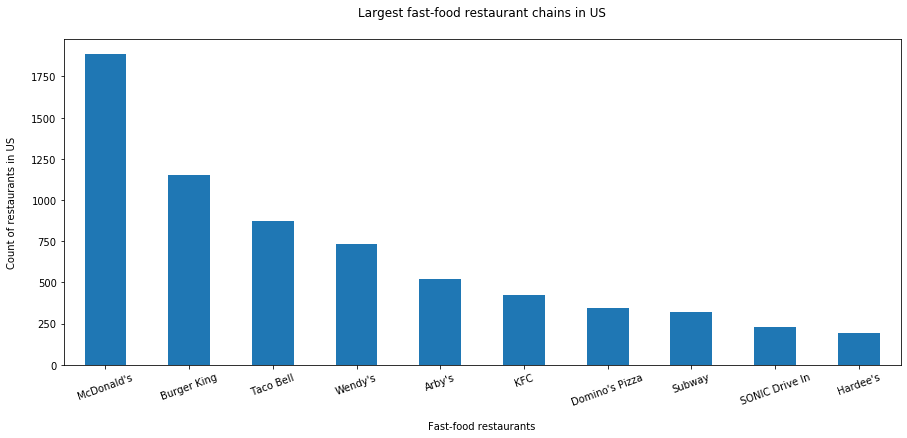

In [19]:
df_01['name'].value_counts().head(10).plot(kind='bar', figsize=(15, 6), rot=20)
plt.xlabel("Fast-food restaurants", labelpad=14)
plt.ylabel("Count of restaurants in US", labelpad=14)
plt.title("Largest fast-food restaurant chains in US", y=1.05)

In [ ]:
"""
### nlk edit ditance algorithm taken from https://www.kaggle.com/agilesifaka/detailed-eda-with-visualizations
### ["McDonald's", 'McDonalds', "Mcdonald's", "Mc Donald's", 'Mcdonalds', 'Mc Donalds', 'McDonald’s'] 
### grouping same restaurants which are represented by different names in the dataset.

restaurant_names = df_01['name'].unique()
# # calculate similarity and record most-similar names together
most_similar = []
 
for i in range(len(restaurant_names)):
     # temporary list to store the current similar words
    temp_similar = [restaurant_names[i]]
    
     # compare and save similar words
    for j in range(len(restaurant_names)):
        if restaurant_names[i] == restaurant_names[j]:
            continue
        if nltk.edit_distance(restaurant_names[i].lower(), restaurant_names[j].lower()) < 3:
            temp_similar.append(restaurant_names[j])
            #print(temp_similar)
           
     # similar word(s) found
    if len(temp_similar) > 1:
         most_similar.append(temp_similar)
    #if i > 0 and i % 10 == 0:
         #print("index", i-10, "-", i, "checking finished| most similar size:", len(most_similar))
## count number of similar words
most_similar_word_count = 0
for i in most_similar:
    most_similar_word_count += len(i)
    #print("size of the most similar list:", most_similar_word_count)
print(most_similar)



### output of grouped restaurants copied to new list
###most_similar_new = [["McDonald's", 'McDonalds', "Mcdonald's", "Mc Donald's", 'Mcdonalds', 'Mc Donalds', 'McDonald’s'], ["Wendy's", 'Wendys'], ["Domino's Pizza", 'Dominos Pizza'], ['SONIC Drive In', 'Sonic Drive-In', 'SONIC Drive-In', 'Sonic Drive In', 'Sonic Drive in', 'Sonic Drive-in'], ["Long John Silver's", 'Long John Silvers'], ['Sonic Drive-In', 'SONIC Drive In', 'SONIC Drive-In', 'Sonic Drive In', 'Sonic Drive in', 'Sonic Drive-in'], ['McDonalds', "McDonald's", "Mcdonald's", "Mc Donald's", 'Mcdonalds', 'Mc Donalds', 'McDonald’s'], ['Taco Time', 'TacoTime'], ["Jimmy John's", 'Jimmy Johns'], ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"], ["Hardee's", 'Hardees'], ["Rally's", 'Rallys'], ['Jack in the Box', 'Jack In The Box'], ['Subway', 'SUBWAY', 'SUBWAY®'], ['Mr Hero', 'Mr. Hero'], ['B. Good', 'b.good'], ['Back Yard Burgers', 'Backyard Burgers'], ["Arby's", "Luby's", 'Arbys', "Zaxby's"], ['Chick-fil-A', 'Chick-Fil-A', 'Chick-fil-a'], ['SUBWAY', 'Subway', 'SUBWAY®'], ["Mcdonald's", "McDonald's", 'McDonalds', "Mc Donald's", 'Mcdonalds', 'Mc Donalds', 'McDonald’s'], ["Popeye's Chicken & Biscuits", 'Popeyes Chicken & Biscuits'], ['Jimmy Johns', "Jimmy John's"], ['Checkers', "Checker's"], ['KFC', 'Kfc'], ['Jack In The Box', 'Jack in the Box'], ['Chick-Fil-A', 'Chick-fil-A', 'Chick-fil-a'], ["Culver's", 'Culvers'], ['KFC / Taco Bell', 'KFC/Taco Bell'], ['SUBWAY®', 'Subway', 'SUBWAY'], ['b.good', 'B. Good'], ['Dunkin Donuts', "Dunkin' Donuts"], ["Carl's Jr.", "Carl's Jr", 'Carls Jr'], ['Cook Out', 'Cook-Out', 'Cookout'], ['Mr. Hero', 'Mr Hero'], ["Mc Donald's", "McDonald's", 'McDonalds', "Mcdonald's", 'Mcdonalds', 'Mc Donalds', 'McDonald’s'], ['Mcdonalds', "McDonald's", 'McDonalds', "Mcdonald's", "Mc Donald's", 'Mc Donalds', 'McDonald’s'], ['Long John Silvers', "Long John Silver's"], ['Frugals', "Frugal's"], ["Dunkin' Donuts", 'Dunkin Donuts'], ["Steak 'n Shake", "Steak 'N Shake", 'Steak N Shake'], ['Rallys', "Rally's"], ['QDOBA Mexican Eats', 'Qdoba Mexican Eats'], ["Carl's Jr", "Carl's Jr.", 'Carls Jr'], ['Dominos Pizza', "Domino's Pizza"], ["Papa John's Pizza", 'Papa Johns Pizza', 'Papa John’s Pizza'], ['Qdoba Mexican Eats', 'QDOBA Mexican Eats'], ['TacoTime', 'Taco Time'], ['Blakes Lotaburger', "Blake's LotaBurger", "Blake's Lotaburger"], ['Cook-Out', 'Cook Out', 'Cookout'], ['Hardees', "Hardee's"], ['KFC - Kentucky Fried Chicken', 'Kfc - Kentucky Fried Chicken'], ['Toppers Pizza', "Topper's Pizza"], ["Topper's Pizza", 'Toppers Pizza'], ['Popeyes Chicken & Biscuits', "Popeye's Chicken & Biscuits"], ['Kum & Go', 'Kum Go'], ['Kfc', 'KFC'], ['SONIC Drive-In', 'SONIC Drive In', 'Sonic Drive-In', 'Sonic Drive In', 'Sonic Drive in', 'Sonic Drive-in'], ["Blake's LotaBurger", 'Blakes Lotaburger', "Blake's Lotaburger"], ['Sonic Drive In', 'SONIC Drive In', 'Sonic Drive-In', 'SONIC Drive-In', 'Sonic Drive in', 'Sonic Drive-in'], ['A&W Restaurant', 'A&w Restaurant', 'Aw Restaurant'], ['Wendys', "Wendy's"], ["Jack's", "JCW's"], ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'], ['Papa Johns Pizza', "Papa John's Pizza", 'Papa John’s Pizza'], ['Papa Johns', "Papa John's"], ["Luby's", "Arby's"], ["Papa John's", 'Papa Johns'], ['Taco Del Mar', 'Taco del Mar'], ['Papa John’s Pizza', "Papa John's Pizza", 'Papa Johns Pizza'], ["Blake's Lotaburger", 'Blakes Lotaburger', "Blake's LotaBurger"], ["Popeye's", 'Popeyes'], ["Thrasher's French Fries", 'Thrashers French Fries'], ["Steak 'N Shake", "Steak 'n Shake", 'Steak N Shake'], ['Cookout', 'Cook Out', 'Cook-Out'], ['Culvers', "Culver's"], ['DQ Grill & Chill', 'Dq Grill & Chill'], ['Sonic Drive in', 'SONIC Drive In', 'Sonic Drive-In', 'SONIC Drive-In', 'Sonic Drive In', 'Sonic Drive-in'], ['Kum Go', 'Kum & Go'], ['Mc Donalds', "McDonald's", 'McDonalds', "Mcdonald's", "Mc Donald's", 'Mcdonalds', 'McDonald’s'], ["JCW's", "Jack's"], ['Port Of Subs', 'Port of Subs'], ['Carls Jr', "Carl's Jr.", "Carl's Jr"], ['Hot Dog On A Stick', 'Hot Dog on a Stick'], ['Sonic Drive-in', 'SONIC Drive In', 'Sonic Drive-In', 'SONIC Drive-In', 'Sonic Drive In', 'Sonic Drive in'], ['Chick-fil-a', 'Chick-fil-A', 'Chick-Fil-A'], ['KFC/Taco Bell', 'KFC / Taco Bell'], ['A&W', 'A&w'], ['Hometown Buffet', 'Home Town Buffet'], ['A&w Restaurant', 'A&W Restaurant', 'Aw Restaurant'], ['Popeyes', "Popeye's"], ['A&W All-American Food', 'A&W All American Food', 'A&W All-American Foods'], ['Backyard Burgers', 'Back Yard Burgers'], ["Carl's Jr - Green Burrito", "Carl's Jr. / Green Burrito", "Carl's Jr / Green Burrito"], ['Carls Jr. / Green Burrito', "Carl's Jr. / Green Burrito", "Carl's Jr / Green Burrito"], ["Carl's Jr. / Green Burrito", "Carl's Jr - Green Burrito", 'Carls Jr. / Green Burrito', "Carl's Jr / Green Burrito"], ['A&W All American Food', 'A&W All-American Food', 'A&W All-American Foods'], ['Spangles', "Spangle's"], ['Hot Dog on a Stick', 'Hot Dog On A Stick'], ['McDonald’s', "McDonald's", 'McDonalds', "Mcdonald's", "Mc Donald's", 'Mcdonalds', 'Mc Donalds'], ['Blimpie', 'BLIMPIE'], ['A&W All-American Foods', 'A&W All-American Food', 'A&W All American Food'], ['L&l Hawaiian Barbecue', 'Ll Hawaiian Barbecue', 'L&L Hawaiian Barbecue'], ["Checker's", 'Checkers'], ["Long John Silver's / A&W", 'Long John Silvers / A&W'], ['Steak N Shake', "Steak 'n Shake", "Steak 'N Shake"], ['Kfc - Kentucky Fried Chicken', 'KFC - Kentucky Fried Chicken'], ['Dq Grill & Chill', 'DQ Grill & Chill'], ['Thrashers French Fries', "Thrasher's French Fries"], ['BLIMPIE', 'Blimpie'], ["Foster's Freeze", 'Fosters Freeze'], ['Taco del Mar', 'Taco Del Mar'], ['Arbys', "Arby's"], ["D'Angelo Grilled Sandwiches", "D'angelo Grilled Sandwiches"], ['Home Town Buffet', 'Hometown Buffet'], ['Ll Hawaiian Barbecue', 'L&l Hawaiian Barbecue', 'L&L Hawaiian Barbecue'], ["Carl's Jr / Green Burrito", "Carl's Jr - Green Burrito", 'Carls Jr. / Green Burrito', "Carl's Jr. / Green Burrito"], ["Frugal's", 'Frugals'], ["Spangle's", 'Spangles'], ["Zaxby's", "Arby's"], ['Aw Restaurant', 'A&W Restaurant', 'A&w Restaurant'], ['A&w', 'A&W'], ['Long John Silvers / A&W', "Long John Silver's / A&W", 'Long John Silver/ A&W'], ['Fosters Freeze', "Foster's Freeze"], ["D'angelo Grilled Sandwiches", "D'Angelo Grilled Sandwiches"], ['Port of Subs', 'Port Of Subs'], ['L&L Hawaiian Barbecue', 'L&l Hawaiian Barbecue', 'Ll Hawaiian Barbecue'], ['Long John Silver/ A&W', 'Long John Silvers / A&W']]
def sortFirst(val): 
    return val[0]  

# sorts the array in ascending according to 1st element 
most_similar_new.sort(key = sortFirst) 
print((most_similar_new))
 
## function for getting unique values
def getuniquevalues(x): 
    unique_values = []
    for i in range(0, len(x) - 1):
        if(x[i] != x[i+1]) & i != len(x) - 2:
              unique_values.append(x[i])
        else:
            if(x[i] != x[i+1]):
                unique_values.append(x[i+1])
    return unique_values

# get unique values of grouped restaurant list
print(getuniquevalues(most_similar))
"""

Text(0.5, 1.05, 'Cities with most no.of restaurants in US')

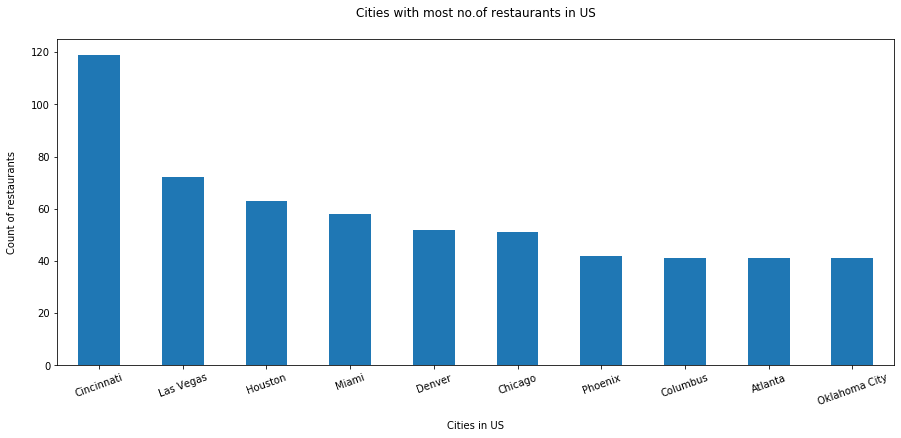

In [20]:
df_01['city'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(15, 6), rot=20, stacked = True)
plt.xlabel("Cities in US", labelpad=14)
plt.ylabel("Count of restaurants", labelpad=14)
plt.title("Cities with most no.of restaurants in US", y=1.05)

In [ ]:
"""
#practise group by 
grouped = df_01[['city', 'name']].groupby(['city'])

for name,group in grouped:
    print(name)
    print(group)
"""

In [ ]:
"""
#practise code
xx = df_01[['city', 'name']].groupby(['city'], sort=True)['name'].count().head(10)
df_01['city'].value_counts().sort_values(ascending = False).head(10)
df_01[['city', 'name']].groupby(['city']).get_group('Ahoskie').head(10)
"""

In [ ]:
"""
print(df_01[['city', 'name']].groupby('city')['name'].value_counts().sort_values(ascending = False))
#print(df_01[['city', 'name']].groupby('city')['name'].get_group('Cincinnati').value_counts()) 
df_01[['city', 'name']].groupby('city')['name'].value_counts() 
"""

In [24]:
top_cities = df_01['city'].value_counts().sort_values(ascending = False).head(10)
top_restaurants = df_01['name'].value_counts().sort_values(ascending = False).head(10)
top_cities.values
top_cities.index

Index(['Cincinnati', 'Las Vegas', 'Houston', 'Miami', 'Denver', 'Chicago',
       'Phoenix', 'Columbus', 'Atlanta', 'Oklahoma City'],
      dtype='object')

In [25]:
pd_series = df_01[(df_01['city'].isin(top_cities.index)) & (df_01.name == "McDonald's")].groupby('city')['name'].value_counts()

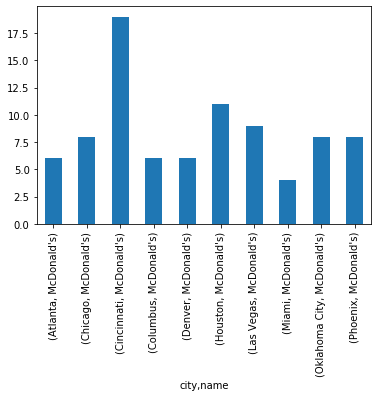

In [74]:
### Bar plot of restaurant count in the top cities.
pd_series.plot(kind = 'bar')

In [27]:
top_provinces = df_01.province.sort_values(ascending = False).value_counts().head(10)
top_provinces

CA    676
TX    634
OH    543
FL    471
IN    379
IL    363
NC    358
GA    347
MO    334
KY    332
Name: province, dtype: int64

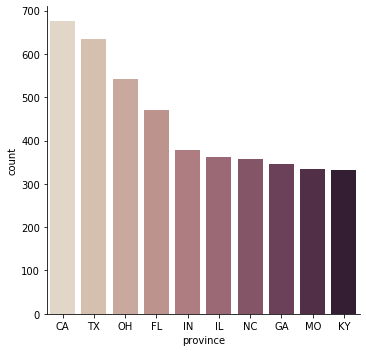

In [28]:
### use category plot of seaborn to observe count of restaurants in provinces sorted in reverse order. 
sns.catplot(x="province", kind="count", palette="ch:.25", order = top_provinces.index, data=df_01[df_01.province.isin(top_provinces.index)]);

In [73]:
## practise 
df_01[df_01.city == "Miami"].sort_values("restaurant_count")

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,restaurant_count,restaurants_per_city
7336,165 SE 3rd Ave,Miami,US,us/fl/miami/165se3rdave/-891525969,25.772984,-80.188499,SUBWAY,33131,FL,"http://www.subway.com,http://subway.com/",1,58
4499,7405 NW 36th St,Miami,US,us/fl/miami/7405nw36thst/-1161002137,25.809930,-80.317370,Mcdonalds,33166,FL,"http://mcdonalds.com,http://www.mcdonalds.com/...",1,58
5661,15455 SW 137th Ave,Miami,US,us/fl/miami/15455sw137thave/705584351,25.623972,-80.413689,Los Verdes,33177,FL,None,1,58
5945,18601 S. Dixie Highway,Miami,US,us/fl/miami/18601sdixiehighway/-230200247,25.595700,-80.354900,Boston Market,33157,FL,"http://www.bostonmarket.com,https://www.boston...",1,58
6971,710 NW 37th Ave,Miami,US,us/fl/miami/710nw37thave/-864103396,25.779633,-80.256040,Taco Bell,33125,FL,"http://www.tacobell.com/,http://tacobell.com",1,58
4445,10754 SW 24th St,Miami,US,us/fl/miami/10754sw24thst/89177860,25.746553,-80.369168,Dunkin' Donuts,33165,FL,"http://www.dunkindonuts.com,http://www.dunkind...",1,58
9068,6815 Biscayne Blvd,Miami,US,us/fl/miami/6815biscayneblvd/1523057879,25.838570,-80.184250,Luna Corner Pizza,33138,FL,http://lunacornerpizza.com,1,58
4434,8565 Coral Way,Miami,US,us/fl/miami/8565coralway/89177860,25.747800,-80.332800,Dunkin Donuts,33155,FL,http://www.dunkindonuts.com,1,58
2272,1699 Ne 123rd St,Miami,US,us/fl/miami/1699ne123rdst/-1187034703,25.889500,-80.164800,Flip Burger Bar,33181,FL,None,1,58
8116,8403 NW 12th St,Miami,US,us/fl/miami/8403nw12thst/-1161002137,25.783830,-80.333240,McDonalds,33126,FL,"http://mcdonalds.com,http://mcdonalds.com/",1,58


In [53]:
### Transform adds the values to the original dataframe. Here, group by city and name to get count of each restaurant in each city.
df_01['restaurant_count'] = df_01.groupby(['city','name'])['name'].transform('count')

In [54]:
top_cities_df = (df_01[(df_01.city.isin(top_cities.index)) & (df_01.name.isin(top_restaurants.index))].sort_values("city")).drop_duplicates()
print(top_cities_df.shape)

(349, 11)


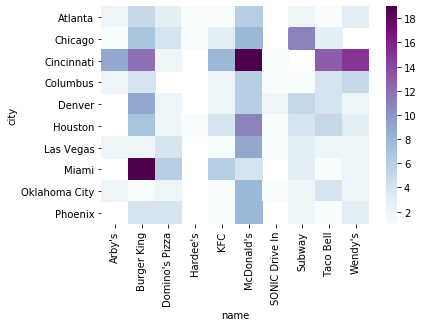

In [52]:
### Heat map of distribution of top restaurants in top cities.
top_cities_heatmap = pd.pivot_table(top_cities_df, values='restaurant_count', 
                     index=['city'], 
                     columns='name')
sns.heatmap(top_cities_heatmap, cmap="BuPu")

In [57]:
### group by city and get total restaurant count for each city
df_01['restaurants_per_city'] = df_01.groupby(['city'])['name'].transform('count')

In [58]:
df_01['restaurants_per_city'] 

0        3
1        6
2        6
3        3
4       16
        ..
9995    14
9996     6
9997     5
9998     3
9999    13
Name: restaurants_per_city, Length: 10000, dtype: int64

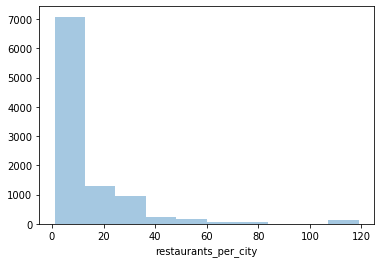

In [71]:
###  univariate analysis of number of restaurants per city
sns.distplot(df_01.restaurants_per_city.dropna(), kde=False, bins = 10);  

In [72]:
df_01.describe() ## watch statistics of newly generated columns. 

,latitude,longitude,restaurant_count,restaurants_per_city
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.552195,-91.056132,1.835000,12.812200
std,5.050275,18.556339,2.055577,17.560119
min,-6.244273,-159.378915,1.000000,1.000000
25%,34.028706,-97.412631,1.000000,3.000000
50%,38.298217,-87.660930,1.000000,7.000000
75%,41.116765,-81.458351,2.000000,15.000000
max,64.840240,123.012361,19.000000,119.000000


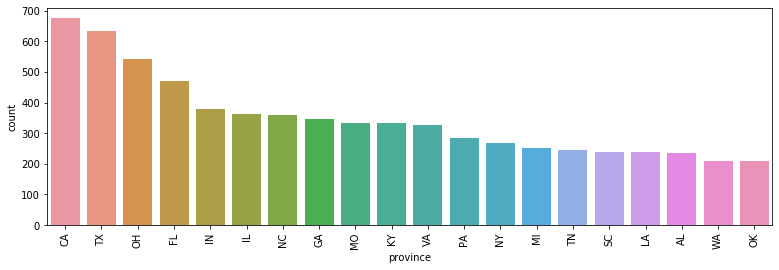

In [70]:
#### another way of plotting top 20 provinces with most number of restaurants using seaborn. 
plt.figure(figsize=(13, 4))
sns.countplot(df_01.province.dropna(), order = df_01.province.value_counts().iloc[:20].index)
plt.xticks(rotation=90);